# Perceptrons

This lab serves as a step-by-step tutorial for creating a simple feedforward neural network with one layer for a binary image classification. This simple is also referred to as the [perceptron](https://en.wikipedia.org/wiki/Perceptron). You can further enhance it by adding more layers and adjusting hyperparameters.

## The MNIST data set

In our neural network lectures we will be using the MNIST (Modified National Institute of Standards and Technology) data set, comprising pixelated images of handwritten digits from 0 to 9. Each image consists of grayscale pixels ranging from 0 (no marking) to 255 (darkest marking), measuring handwriting intensity. Originally, it held 60,000 training images and 10,000 test images. More background information on the data set can be found at it's Wikipedia page https://en.wikipedia.org/wiki/MNIST_database. Throughout our neural network lectures, we'll engage with a smaller, lower-resolution `sklearn` version. This sklearn version offers reduced image quality for quicker data loading and algorithm fitting. You can access it using the load_digits function from the datasets module [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).
sklearn version


In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

In [2]:
from sklearn.datasets import load_digits

## Load the dataset and call it digits
X,y = load_digits(return_X_y=True)

Let's dive into our dataset. We can start by figuring out what type each data point is and how many we've got.

In [3]:
## Type of X
type(X)

numpy.ndarray

In [4]:
## Length of X
len(X)

1797

In [5]:
## lets what is the first element in the array
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

This is our first image represented as pixel matrix. How many pixels does it have?

In [6]:
len(X[0,:])

64

From this we can see that the data contains  1,797,  $8\times8$ images. 
Lets visualize them.

In [7]:
# What digit does X[0] represent?
y[0]

0

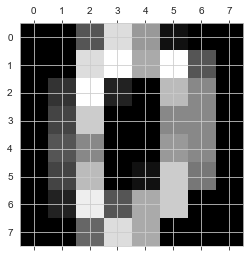

In [8]:
#Let's confirm the previous fact by plotting X[0].
plt.matshow(X[0, :].reshape(8, 8))
plt.gray()
plt.show()

It would be great if we could display this with its associated label.

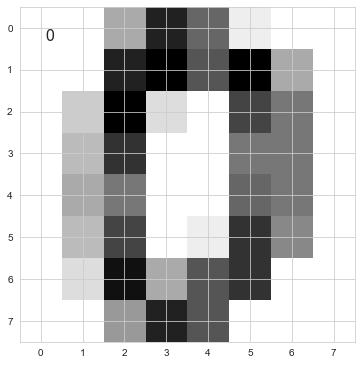

In [9]:
fig, ax = plt.subplots(figsize=(6, 10))  # Creating figure and axes

# Displaying the image
ax.imshow(X[0, :].reshape(8, 8), cmap='gray_r')

# Adding label text
ax.text(.1, .3, str(y[0]), fontsize=16)  # Assuming you want to display the label for the first element y[0]

plt.show()  # Displaying the plot


Could you remove the axes? Create subplots for the first six images.

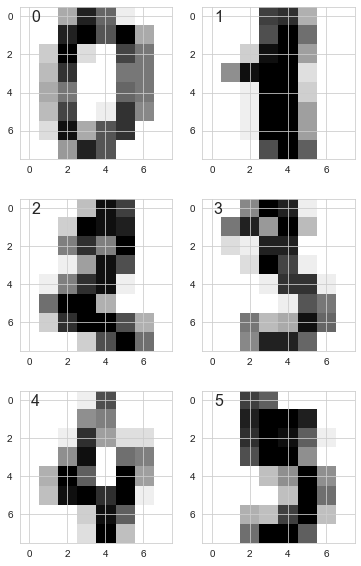

In [10]:
## plot the first 6 images together without 

# Creating subplots with a 3x2 grid and defining figure size
fig, ax = plt.subplots(3, 2, figsize=(6, 10))

# Iterating through the subplots
for i in range(6):
    # Displaying images and associated labels
    ax[i // 2, i % 2].imshow(X[i, :].reshape(8, 8), cmap='gray_r')  # Displaying the image
    ax[i // 2, i % 2].text(.1, .3, str(y[i]), fontsize=16)  # Adding label text

# Displaying the plot
plt.show()


In [64]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Convert labels to binary classification: 1 if the digit is 0, else 0
y_train_binary = np.where(y_train < 6, 1, 0)
y_test_binary = np.where(y_test < 6, 1, 0)

In [96]:
y_test_binary

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

## A Perceptron For Binary Classification

Our objective is to design a single-layer feedforward deep learning model $F(x) = Relu( Ax + b )$ that receives an image $x$ from the MNIST dataset and determines whether it represents the digit zero or not. 


__Step 1__ Start with initializing parameters: weights (A) and bias (b) 


In [97]:
import numpy as np

def initialize_parameters(input_size, output_size):
    weights = np.random.randn(input_size, output_size)
    bias = np.random.rand(1, output_size)
    return weights, bias

__Step 2:__ Define the ReLu function. Recall that $Relu(x) = max(x,0)$

In [98]:
def relu(x):
    return np.maximum(0, x)

__Step 3__ Now its time to define our $F$

In [99]:
def forward_propagation(x, weights, bias):
    z = np.dot(x, weights) + bias
    return relu(z)

__Step 4__  So now it's time _train_ our model. That is to iterates through the training dataset, adjusting the weights and bias in each iteration to improve the network's performance in predicting the output based on the given inputs. One complete cycle through the entire training dataset is called _epoch_ (the entire training dataset will be passed forward and backward through the neural network).

Define a function with the following variables: an image: `x`, its coresponding label: `y`, `weights`: $A$  and `bias`: $b$, the number of epoch: `epochs`, and the learning rate: `learning_rate`. 

Your function should iterates through the dataset for the specified number of epochs, adjusting the weights and bias in each iteration to improve the network's performance in predicting the output based on the given inputs.


In [100]:
def train_neural_network(x, y, weights, bias, epochs, learning_rate):
    for epoch in range(epochs):
        # Forward propagation
        output = forward_propagation(x, weights, bias)
        
        # Calculate the loss
        error = output - y
        loss = np.mean(error ** 2)
        
        # Backpropagation
        # Chain rule to compute gradients
        grad_output = 2 * error / len(x) #gradient of loss with respect to output
        grad_weights = np.dot(x.T, grad_output) #gradient of loss with respect to weights by chain rule 
        grad_bias = np.sum(grad_output, axis=0, keepdims=True) #gradient of loss with respect to bias by chain rule 
        
        # Update weights and bias
        weights -= learning_rate * grad_weights
        bias -= learning_rate * grad_bias
        
        # Print the loss
        if epoch % 100 == 0:
            print(f'Epoch {epoch}: Loss {loss}')
    return weights, bias

In [101]:
# Initialize parameters

input_size = X_train.shape[1] # input size should be the size of each image 8x8
output_size = 1 # input size should be the size of lable of each image 8x8

weights, bias = initialize_parameters(input_size, output_size)

# Reshape the target arrays to match the expected shapes
y_train_binary = y_train_binary.reshape(-1, 1)
y_test_binary = y_test_binary.reshape(-1, 1)

# Train the neural network
W , b = train_neural_network(X_train, y_train_binary, weights, bias, epochs=1100, learning_rate=0.01)


Epoch 0: Loss 1499.1422426663948
Epoch 100: Loss 0.5998608211551845
Epoch 200: Loss 0.5998608211551845
Epoch 300: Loss 0.5998608211551845
Epoch 400: Loss 0.5998608211551845
Epoch 500: Loss 0.5998608211551845
Epoch 600: Loss 0.5998608211551845
Epoch 700: Loss 0.5998608211551845
Epoch 800: Loss 0.5998608211551845
Epoch 900: Loss 0.5998608211551845
Epoch 1000: Loss 0.5998608211551845


In [102]:
# Predict using the trained model
predictions = forward_propagation(X_test, W, b)
predicted_labels = np.where(predictions >= 0.5, 1, 0)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test_binary)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Test accuracy: 38.61%


In [103]:
predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [104]:
# Choose a random example from the test set
index = np.random.randint(0, len(X_test))
image = X_test[index]
label = y_test_binary[index]
# Reshape the example image to match the input size of the network
image = image.reshape(1, -1)

# Use the trained model to predict on this example
prediction = forward_propagation(image, W, b)
predicted_label = 1 if prediction >= 0.5 else 0

# Print the prediction and actual label
print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {label}")


Predicted Label: 0
Actual Label: [1]


__Discussion:__

Q1. Judging by the accuracy, how well is your model performing?

_Your Answer:_ Not so good. All predictions are zero

Q2. Convert labels to a different binary classification: 1 if the digit is less than 2; otherwise, 0. Then, retrain your model. How well is your model performing?

_Your Answer:_ Not good all predictions are zero

Q3: Convert labels to a different binary classification: 1 if the digit is less than 5; otherwise, 0. Then, retrain your model. How well is your model performing?

_Your Answer:_ Almost all predictions are zero



__Conclusion:__
A single perceptron is not capable of separating data sets that are not linearly separable. This severely hurt interest in the method back in the 1950s and 60s, <a href="https://en.wikipedia.org/wiki/Perceptron">https://en.wikipedia.org/wiki/Perceptron</a>. 

However, if your data is linearly separable there is a proof that guarantees the perceptron will converge as well as an upper bound on the number of epochs it must endure to get there, see the previous wikipedia link.
